In [88]:
import numpy as np

import matplotlib.pyplot as plt

import copy

import sys
sys.path.insert(0,"C:/Users/Dustin/Desktop/Numerische Methoden/VS Code/NM-Code-for-Excercises")
import shortcuts as s

In [89]:
def function(x):
    return np.abs(np.sin(x))

pi = np.pi

N = 16

M = int(N/2)

L = pi

x = np.asfarray([i*(L/N) for i in range(N)],dtype=complex)

f = np.asfarray([function(x[i]) for i in range(N)],dtype=complex)

In [90]:
def P_trig(x,x_val,f,L,M):
    pi = np.pi

    N = 2*M

    A = np.zeros(N,dtype=complex)

    for k in range(M+1):
        sum = 0
        for j in range(16):
            sum += f[j]*np.cos(2*pi*(1/L)*k*x_val[j])
        A[k] = (1/8)*sum

    B = np.zeros(N,dtype=complex)

    for k in range(1,M,1):
        sum = 0
        for j in range(16):
            sum += f[j]*np.sin(2*pi*(1/L)*k*x_val[j])
        B[k] = (1/8)*sum

    sum = 0
    for k in range(1,M,1):
        sum += A[k]*np.cos(2*pi*(1/L)*k*x) + B[k]*np.sin(2*pi*(1/L)*k*x)

    if M == 1:
        return (A[0]*0.5 + (A[1])*np.cos(2*x))
    
    P = A[0]/2 + sum + (A[M]/2)*np.cos(2*pi*M*(1/L)*x)

    return P

In [91]:
# def P_trig(x,x_val,f,L,M):
#     pi = np.pi

#     N = 2*M

#     A = np.zeros(N,dtype=complex)

#     for k in range(M+1):
#         sum = 0
#         for j in range(16):
#             sum += f[j]*np.cos(2*pi*(1/L)*k*x_val[j])
#         A[k] = (1/8)*sum

#     B = np.zeros(N,dtype=complex)

#     for k in range(1,M,1):
#         sum = 0
#         for j in range(16):
#             sum += f[j]*np.sin(2*pi*(1/L)*k*x_val[j])
#         B[k] = (1/8)*sum

#     sum = 0
#     for k in range(1,M,1):
#         sum += A[k]*np.cos(2*pi*(1/L)*k*x) + B[k]*np.sin(2*pi*(1/L)*k*x)

#     #if M == 1:
#         #return (A[0]*0.5 + (A[1]/2)*np.cos(2*x))
    
#     P = A[0]/2 + sum + (A[M]/2)*np.cos(2*pi*M*(1/L)*x)

#     return P,A,B


# x = np.asfarray([i*(np.pi/16) for i in range(16)],dtype=complex)

# print(P_trig(2,x,f,np.pi,8)[1],"\n")
# print(P_trig(2,x,f,np.pi,8)[2],"\n")


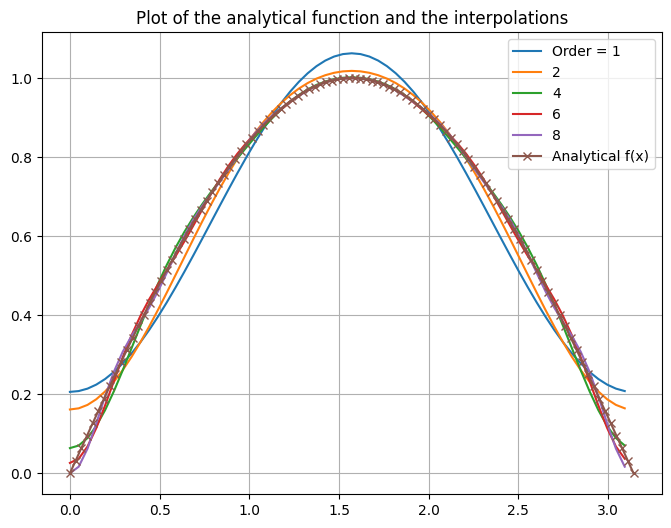

In [92]:
L = np.pi

x = np.asfarray([i*(L/N) for i in range(N)],dtype=complex)

f = np.asfarray([function(x[i]) for i in range(N)],dtype=complex)

#########################################################################################################
x_real = np.linspace(0,np.pi,100)           

y_real = [function(x_real[i]) for i in range(100)]
#########################################################################################################
x_test = np.asfarray([i*(L/64) for i in range(64)],dtype=complex)                       

y_test = np.zeros(64,dtype=complex)
#########################################################################################################

fig, ax = plt.subplots(figsize=(8,6))

#########################################################################################################
for i in range(64):                                         
    y_test[i] = P_trig(x_test[i],x,f,L,1)

ax.plot(np.real(x_test),np.real(y_test), label="Order = 1")                     #plotting the interpolation for degree 1
#########################################################################################################

for i in range(2,10,2):
    x_test = np.asfarray([i*(L/64) for i in range(64)],dtype=complex)             #plotting the interpolation for degree 2,4,6,8
    for j in range(64):
        y_test[j] = P_trig(x_test[j],x,f,L,i)
    ax.plot(np.real(x_test),np.real(y_test), label=i)
#########################################################################################################

ax.plot(x_real,y_real,label="Analytical f(x)",marker="x")                  #plotting the function analytically

#########################################################################################################
plt.title("Plot of the analytical function and the interpolations")
ax.grid()
ax.legend()



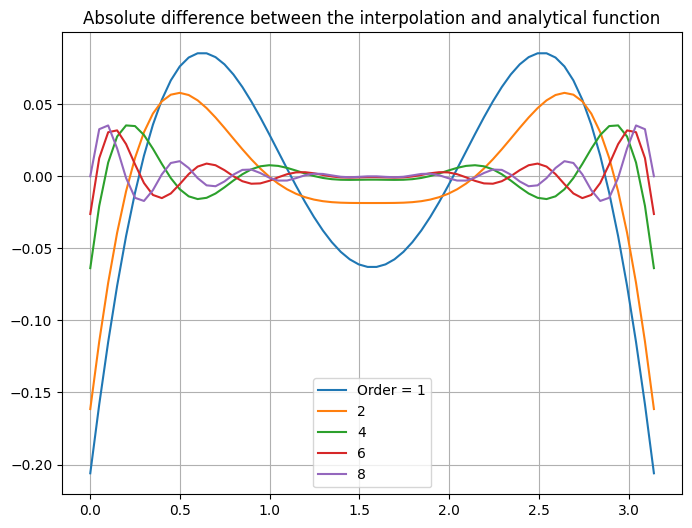

In [97]:
x = np.asfarray([i*(L/N) for i in range(N)],dtype=complex)

f = np.asfarray([function(x[i]) for i in range(N)],dtype=complex)

L = np.pi

#########################################################################################################
x_real = np.linspace(0,np.pi,64)           

y_real = [function(x_real[i]) for i in range(64)]
#########################################################################################################
x_test = np.linspace(0,np.pi,64)                    

y_test = np.zeros(64,dtype=complex)
#########################################################################################################

fig, ax = plt.subplots(figsize=(8,6))

#########################################################################################################
for i in range(64):                                         
    y_test[i] = P_trig(x_test[i],x,f,L,1)

ax.plot(x_real,y_real-np.real(y_test), label="Order = 1")                     #plotting the interpolation for degree 1
#########################################################################################################

for i in range(2,10,2):
    x_test = np.linspace(0,np.pi,64)             #plotting the interpolation for degree 2,4,6,8
    for j in range(64):
        y_test[j] = P_trig(x_test[j],x,f,L,i)
    ax.plot(x_real,y_real-np.real(y_test), label=i)
#########################################################################################################

#ax.plot(x_real,y_real,label="Precise f(x)",marker="x")                  #plotting the function analytically

#########################################################################################################
plt.title("Absolute difference between the interpolation and analytical function")
ax.grid()
ax.legend()